In [25]:
import pysm3
import pysm3.units as u
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from funzioni import get_pixel_value
from funzioni import norma
from astropy.modeling import models
from astropy import units as u
from astropy.modeling.models import BlackBody
from astropy.visualization import quantity_support

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:

#frequencies= np.linspace(40,400,20)
frequencies = np.array([40,50,60,68,78,89,100,119,140,166,195,235,280,337,402])

In [28]:
Sky_D=pysm3.Sky(nside=64, preset_strings=["d1"])

In [29]:
Sky_S=pysm3.Sky(nside=64, preset_strings=["s1"])

In [30]:
map_D_1 = Sky_D.get_emission(545 * u.GHz) 
Stokes_ref_D_1= map_D_1[0][1]
map_D_1000 = Sky_D.get_emission(545 * u.GHz) 
Stokes_ref_D_1000= map_D_1000[0][1000]
map_D_40000 = Sky_D.get_emission(545 * u.GHz) 
Stokes_ref_D_40000= map_D_40000[0][40000]

In [31]:
map_S_1 = Sky_S.get_emission(0.408 * u.GHz) 
Stokes_ref_S_1= map_S_1[0][1]
map_S_1000 = Sky_S.get_emission(0.408 * u.GHz) 
Stokes_ref_S_1000= map_S_1000[0][1000]
map_S_40000 = Sky_S.get_emission(0.408 * u.GHz) 
Stokes_ref_S_40000= map_S_40000[0][40000]

In [32]:
I_d_1=get_pixel_value(frequencies,npix=1,Stokes=0,sky=Sky_D)
norm_I_d_1=norma(I_d_1,value=Stokes_ref_D_1.value)
I_d_1000=get_pixel_value(frequencies,npix=1000,Stokes=0,sky=Sky_D)
norm_I_d_1000=norma(I_d_1000,value=Stokes_ref_D_1000.value)
I_d_40000=get_pixel_value(frequencies,npix=40000,Stokes=0,sky=Sky_D)
norm_I_d_40000=norma(I_d_40000,value=Stokes_ref_D_40000.value)

In [33]:
I_s_1=get_pixel_value(frequencies,npix=1,Stokes=0,sky=Sky_S)
norm_I_s_1=norma(I_s_1,Stokes_ref_S_1.value)
I_s_1000=get_pixel_value(frequencies,npix=1000,Stokes=0,sky=Sky_S)
norm_I_s_1000=norma(I_s_1000,Stokes_ref_S_1000.value)
I_s_40000=get_pixel_value(frequencies,npix=40000,Stokes=0,sky=Sky_S)
norm_I_s_40000=norma(I_s_40000,Stokes_ref_S_40000.value)

In [34]:
k = 1.38e-23
h = 6.626e-34

T=20
c=10e8
nu_d=545



In [35]:
modified_BB_I_d=(np.exp((h*nu_d*10**9)/(k*T))-1)/(np.exp((h*frequencies*10**9)/(k*T))-1)*(frequencies/nu_d)**(1+1.54)
power_law_I_s=((frequencies/0.408)**(-3))


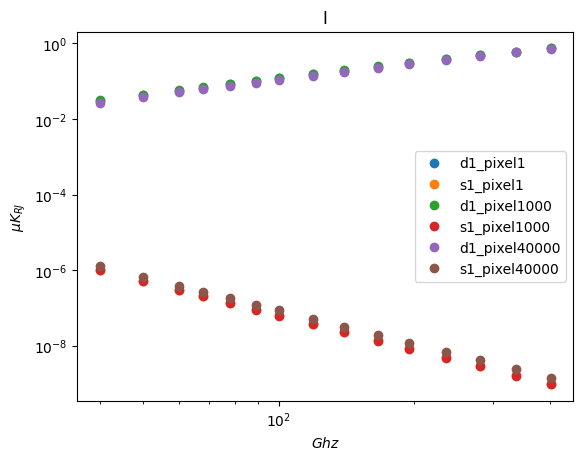

In [36]:
plt.plot(frequencies,norm_I_d_1,'o',label="d1_pixel1")
plt.plot(frequencies,norm_I_s_1,'o',label="s1_pixel1")
plt.plot(frequencies,norm_I_d_1000,'o',label="d1_pixel1000")
plt.plot(frequencies,norm_I_s_1000,'o',label="s1_pixel1000")
plt.plot(frequencies,norm_I_d_40000,'o',label="d1_pixel40000")
plt.plot(frequencies,norm_I_s_40000,'o',label="s1_pixel40000")
#plt.plot(frequencies,modified_BB_I_d,'-',label="d1ref")
#plt.plot(frequencies,power_law_I_s,'-',label="s1ref")



plt.title("I")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()


